In [27]:
from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy import stats

plt.style.use('ggplot')

In [28]:
def load_and_process_data(excel_file):
    """
    Carga los datos del archivo Excel y procesa cada hoja como un cliente diferente
    """
    client_dfs = {}
    
    excel = pd.ExcelFile(excel_file)
    
    for cliente in excel.sheet_names:
        df = pd.read_excel(excel, sheet_name=cliente)
        
        df['Fecha'] = pd.to_datetime(df['Fecha'])
        
        df['hora'] = df['Fecha'].dt.hour
        df['dia_semana'] = df['Fecha'].dt.dayofweek
        df['mes'] = df['Fecha'].dt.month
        
        client_dfs[cliente] = df
    
    return client_dfs

client_dfs = load_and_process_data('Datos.xlsx')

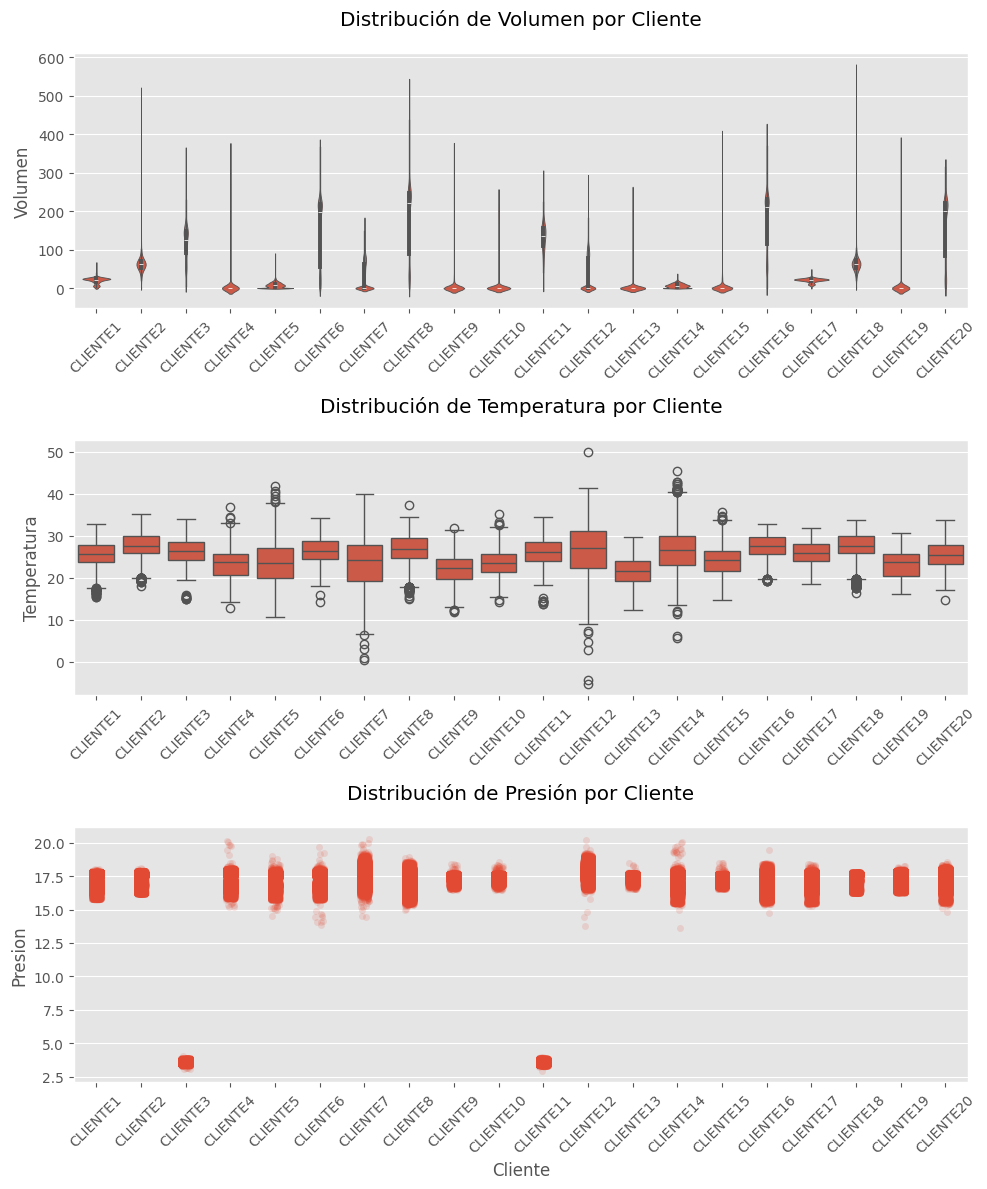


Estadísticas resumidas por cliente:

Volumen:


,count,mean,std,min,25%,50%,75%,max
Cliente,,,,,,,,
CLIENTE1,43412.0,19.976401,7.939171,0.0,16.248989,22.470213,25.533223,65.936644
CLIENTE10,41059.0,11.788209,43.991880,0.0,0.000000,0.000000,0.000000,247.072990
CLIENTE11,42248.0,131.648637,34.225487,0.0,110.646887,136.075518,155.613085,298.259573
CLIENTE12,41776.0,33.731496,41.952033,0.0,0.000000,0.000000,77.654802,284.475087
CLIENTE13,41059.0,10.276088,41.184079,0.0,0.000000,0.000000,0.000000,253.867916
CLIENTE14,43415.0,7.301900,5.257558,0.0,3.097458,6.749423,10.871643,36.793150
CLIENTE15,42428.0,12.553861,47.565636,0.0,0.000000,0.000000,0.000000,398.042027
CLIENTE16,43147.0,178.133946,74.649969,0.0,114.279073,210.869993,231.370549,409.872212
CLIENTE17,43412.0,20.564425,5.566153,0.0,18.426473,21.748120,24.243031,48.504833



Temperatura:


,count,mean,std,min,25%,50%,75%,max
Cliente,,,,,,,,
CLIENTE1,43412.0,25.575853,2.756246,15.401803,23.587235,25.711326,27.695776,32.869112
CLIENTE10,41059.0,23.500489,2.614474,14.291032,21.319390,23.535509,25.593807,35.069721
CLIENTE11,42248.0,26.307152,2.695036,13.731025,24.048241,26.198136,28.569625,34.355276
CLIENTE12,41776.0,26.689551,4.998354,-5.257899,22.217786,27.049023,31.144009,50.019853
CLIENTE13,41059.0,21.591365,2.848899,12.240511,19.233546,21.570406,23.941859,29.753364
CLIENTE14,43415.0,26.658520,4.967158,5.676933,22.873489,26.536903,29.860792,45.378176
CLIENTE15,42428.0,24.026489,3.106018,14.712874,21.565131,24.113353,26.399282,35.661349
CLIENTE16,43147.0,27.481311,2.447194,19.146101,25.683355,27.501598,29.654472,32.658456
CLIENTE17,43412.0,25.849342,2.364020,18.445096,23.898700,25.764589,27.929240,31.917560



Presion:


,count,mean,std,min,25%,50%,75%,max
Cliente,,,,,,,,
CLIENTE1,43412.0,17.535934,0.358310,15.742337,17.590781,17.651439,17.711107,18.074274
CLIENTE10,41059.0,17.473694,0.134933,16.469864,17.421424,17.495303,17.564497,18.573079
CLIENTE11,42248.0,3.545512,0.082752,2.934873,3.490493,3.535771,3.587027,3.954039
CLIENTE12,41776.0,17.833667,0.418490,13.740922,17.538897,17.834866,18.106159,20.232110
CLIENTE13,41059.0,17.492521,0.120068,16.505077,17.457089,17.511078,17.563878,18.471047
CLIENTE14,43415.0,17.517128,0.369094,13.616877,17.568526,17.632941,17.684638,20.028395
CLIENTE15,42428.0,17.495812,0.139307,16.514496,17.471277,17.515236,17.563664,18.493234
CLIENTE16,43147.0,16.705058,0.492334,14.734521,16.347862,16.619526,17.023767,19.440780
CLIENTE17,43412.0,17.533599,0.380016,15.265703,17.581482,17.653419,17.720431,18.445378


In [29]:
# DISTRIBUCIÓN DE LOS DATOS POR CLIENTES
combined_data = []
for client, df in client_dfs.items():
    df_temp = df.copy()
    df_temp['Cliente'] = client
    combined_data.append(df_temp)

combined_df = pd.concat(combined_data)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# 1. Gráfica de Volumen
sns.violinplot(x='Cliente', y='Volumen', data=combined_df, ax=ax1)
ax1.set_title('Distribución de Volumen por Cliente', pad=20)
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=45)

# 2. Gráfica de Temperatura
sns.boxplot(x='Cliente', y='Temperatura', data=combined_df, ax=ax2)
ax2.set_title('Distribución de Temperatura por Cliente', pad=20)
ax2.set_xlabel('')
ax2.tick_params(axis='x', rotation=45)

# 3. Gráfica de Presión
sns.stripplot(x='Cliente', y='Presion', data=combined_df, ax=ax3, dodge=True, alpha=.15, zorder=1, legend=False,)
ax3.set_title('Distribución de Presión por Cliente', pad=20)
ax3.set_xlabel('Cliente')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Mostrar estadísticas resumidas
print("\nEstadísticas resumidas por cliente:")
for variable in ['Volumen', 'Temperatura', 'Presion']:
    print(f"\n{variable}:")
    stats = combined_df.groupby('Cliente')[variable].describe()
    display(stats)

In [30]:
resultados = {}
for cliente, df in client_dfs.items():
        # 1. Análisis de valores nulos
        nulos = df.isna().sum()
        resultados[cliente] = nulos.to_dict()
        
pd.DataFrame(resultados)

,CLIENTE1,CLIENTE2,CLIENTE3,CLIENTE4,CLIENTE5,CLIENTE6,CLIENTE7,CLIENTE8,CLIENTE9,CLIENTE10,CLIENTE11,CLIENTE12,CLIENTE13,CLIENTE14,CLIENTE15,CLIENTE16,CLIENTE17,CLIENTE18,CLIENTE19,CLIENTE20
Fecha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Presion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Temperatura,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Volumen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hora,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dia_semana,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


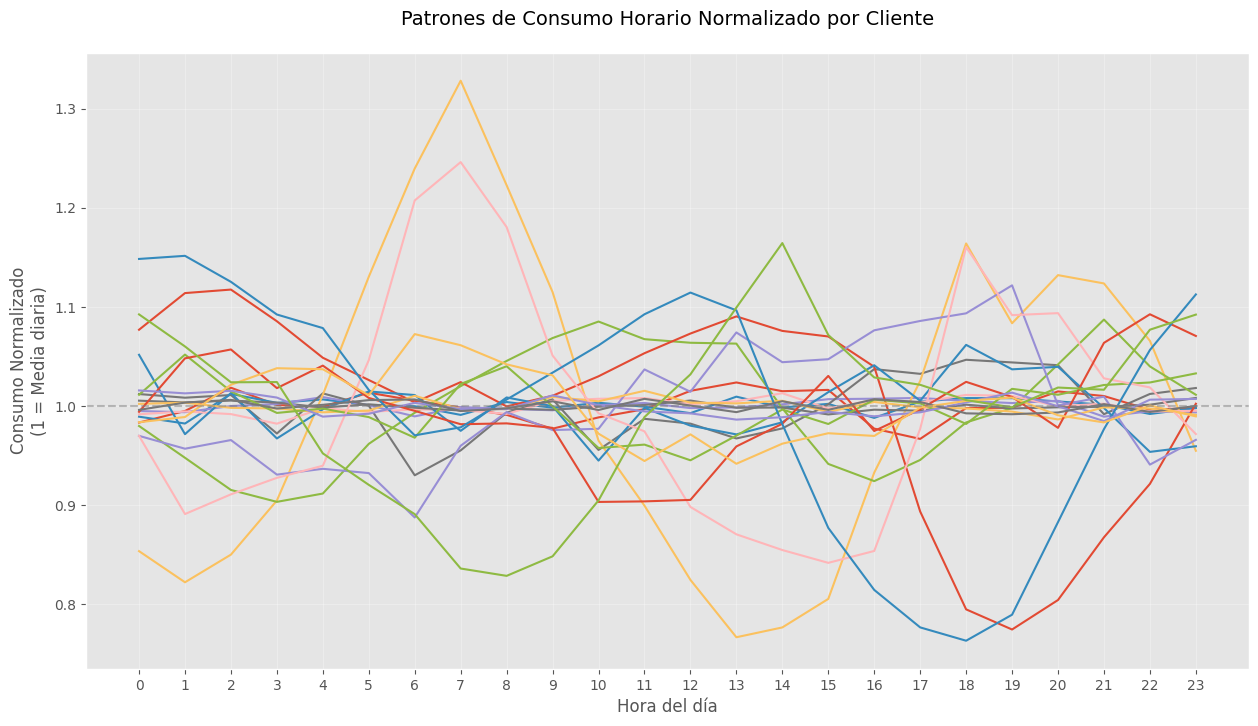

In [31]:
# PATRONES DE CONSUMO HORARIOS POR CLIENTES
consumos_normalizados = {}

for cliente, df in client_dfs.items():
    consumo_horario = df.groupby('hora')['Volumen'].mean()
    
    # Normalizar respecto a la media diaria
    media_diaria = consumo_horario.mean()
    consumo_normalizado = consumo_horario / media_diaria
    
    consumos_normalizados[cliente] = consumo_normalizado

# Crear DataFrame con todos los consumos normalizados
df_normalized = pd.DataFrame(consumos_normalizados)

plt.figure(figsize=(15,8))

for cliente in df_normalized.columns:
    plt.plot(df_normalized.index, df_normalized[cliente], label=cliente,)
    
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)

# Configurar la gráfica
plt.title('Patrones de Consumo Horario Normalizado por Cliente', fontsize=14, pad=20)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Consumo Normalizado\n(1 = Media diaria)', fontsize=12)

# Configurar el eje x para mostrar todas las horas
plt.xticks(range(24), range(24))

# Añadir cuadrícula
plt.grid(True, alpha=0.3)

C:\Users\Esteb\AppData\Local\Temp\ipykernel_12512\3024707779.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, optimal_clusters))



RESUMEN DE CLUSTERING

Número óptimo de clusters: 2

Asignación de clusters:

Cluster 1:
  Clientes: CLIENTE1, CLIENTE18, CLIENTE17, CLIENTE16, CLIENTE15, CLIENTE13, CLIENTE12, CLIENTE11, CLIENTE19, CLIENTE10, CLIENTE8, CLIENTE7, CLIENTE6, CLIENTE4, CLIENTE3, CLIENTE2, CLIENTE9, CLIENTE20
  Número de clientes: 18

Cluster 2:
  Clientes: CLIENTE14, CLIENTE5
  Número de clientes: 2

Características distintivas de los clusters:

Cluster 1:
  Pico máximo: 1.02 veces la media a las 2:00
  Pico mínimo: 0.99 veces la media a las 6:00

Cluster 2:
  Pico máximo: 1.29 veces la media a las 7:00
  Pico mínimo: 0.82 veces la media a las 14:00


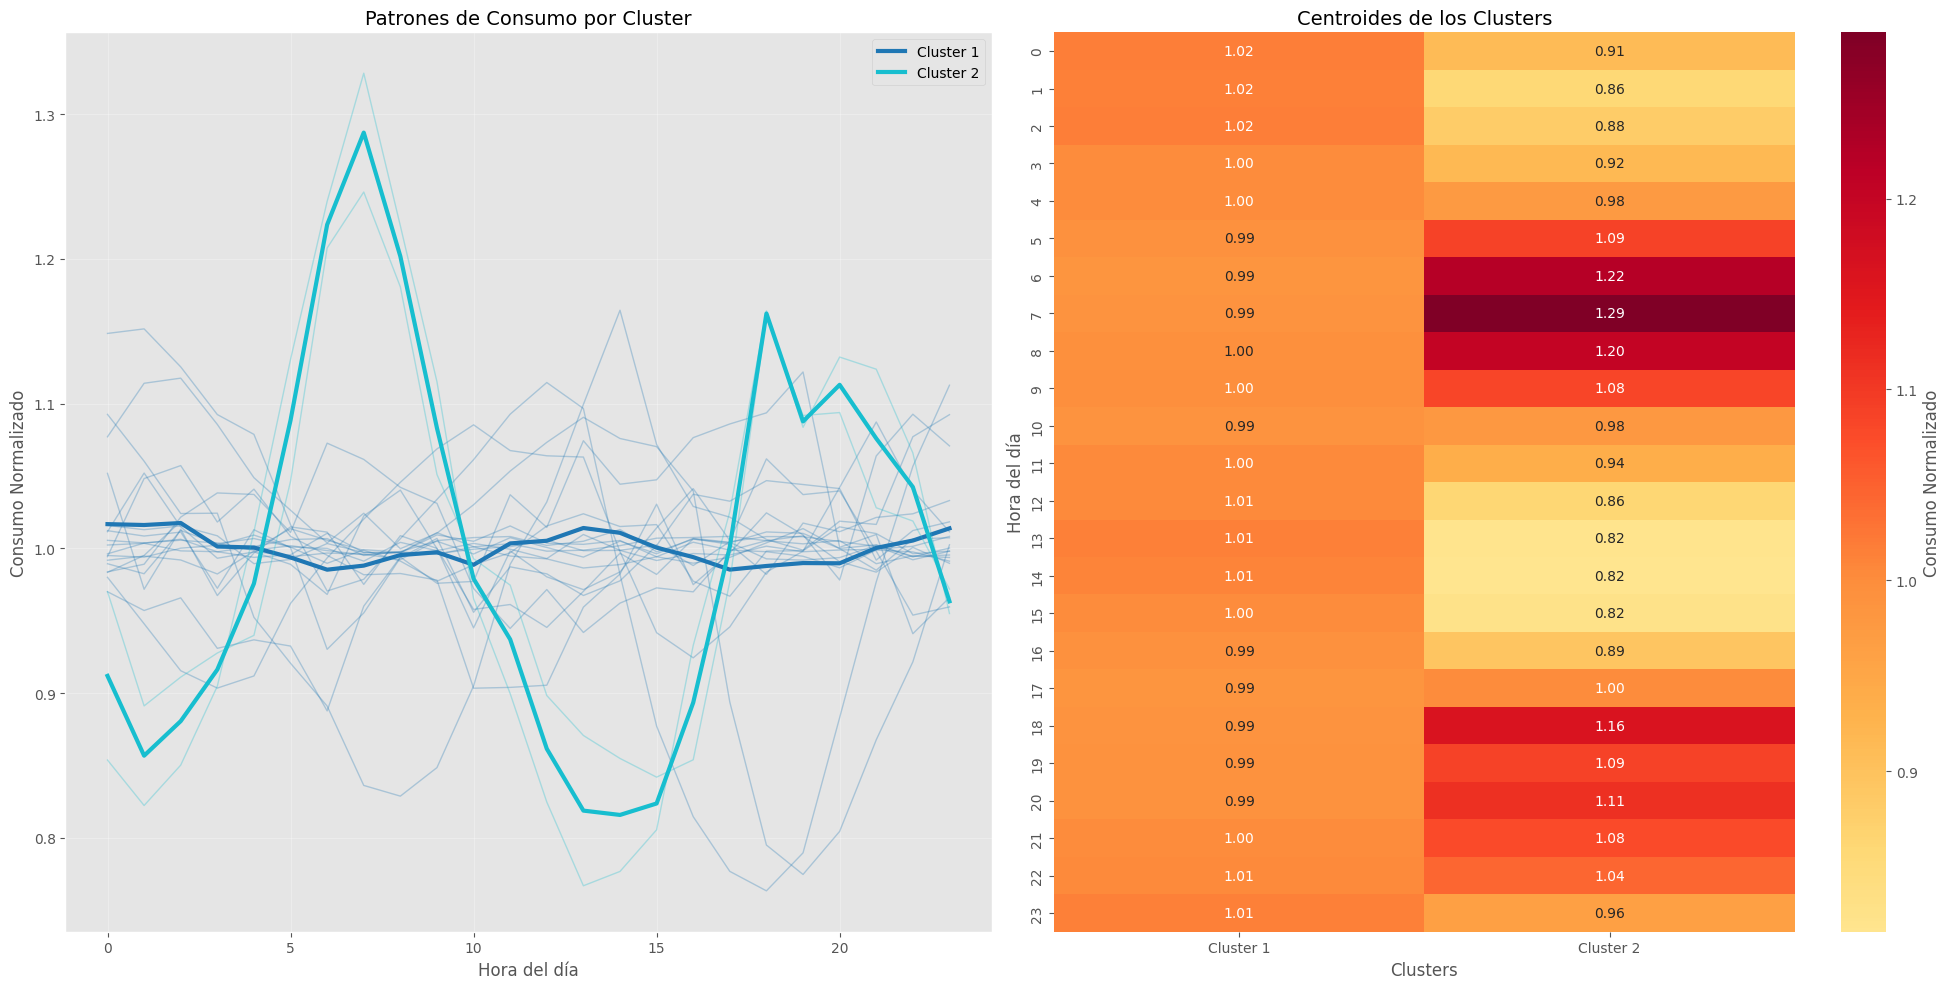

In [32]:
def analizar_clusters_consumo(client_dfs, max_clusters=5):
    """
    Realiza análisis de clustering sobre los patrones de consumo horario
    y visualiza los resultados
    """
    # 1. Preparar los datos para clustering
    consumos_horarios = {}
    
    # Calcular perfiles normalizados para cada cliente
    for cliente, df in client_dfs.items():
        consumo_horario = df.groupby('hora')['Volumen'].mean()
        media_diaria = consumo_horario.mean()
        consumo_normalizado = consumo_horario / media_diaria
        consumos_horarios[cliente] = consumo_normalizado
    
    # Crear matriz de características para clustering
    X = pd.DataFrame(consumos_horarios).T
    
    # 2. Determinar número óptimo de clusters usando silhouette score
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    
    # 3. Aplicar K-means con número óptimo de clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # 4. Crear visualizaciones
    fig = plt.figure(figsize=(20, 10))
    
    # 4.1 Gráfica de perfiles por cluster
    plt.subplot(121)
    
    # Colores para los clusters
    colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, optimal_clusters))
    
    # Plotear los perfiles de cada cluster
    for i in range(optimal_clusters):
        cluster_members = X[cluster_labels == i]
        
        # Plotear cada miembro del cluster con transparencia
        for idx in cluster_members.index:
            plt.plot(range(24), cluster_members.loc[idx], 
                    color=colors[i], alpha=0.3, linewidth=1)
        
        # Plotear el centroide del cluster
        centroid = kmeans.cluster_centers_[i]
        plt.plot(range(24), centroid, 
                color=colors[i], linewidth=3, label=f'Cluster {i+1}')
    
    plt.title('Patrones de Consumo por Cluster', fontsize=14)
    plt.xlabel('Hora del día', fontsize=12)
    plt.ylabel('Consumo Normalizado', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # 4.2 Mapa de calor de los centroides
    plt.subplot(122)
    centroid_df = pd.DataFrame(
        kmeans.cluster_centers_.T,
        columns=[f'Cluster {i+1}' for i in range(optimal_clusters)]
    )
    
    sns.heatmap(centroid_df, cmap='YlOrRd', center=1,
                annot=True, fmt='.2f', cbar_kws={'label': 'Consumo Normalizado'})
    plt.title('Centroides de los Clusters', fontsize=14)
    plt.xlabel('Clusters', fontsize=12)
    plt.ylabel('Hora del día', fontsize=12)
    
    plt.tight_layout()
    
    # 5. Crear resumen de clusters
    cluster_summary = pd.DataFrame({
        'Cliente': X.index,
        'Cluster': cluster_labels + 1
    }).sort_values('Cluster')
    
    print("\nRESUMEN DE CLUSTERING")
    print(f"\nNúmero óptimo de clusters: {optimal_clusters}")
    print("\nAsignación de clusters:")
    for i in range(optimal_clusters):
        clientes = cluster_summary[cluster_summary['Cluster'] == i+1]['Cliente'].tolist()
        print(f"\nCluster {i+1}:")
        print(f"  Clientes: {', '.join(clientes)}")
        print(f"  Número de clientes: {len(clientes)}")
    
    # 6. Calcular características distintivas de cada cluster
    print("\nCaracterísticas distintivas de los clusters:")
    for i in range(optimal_clusters):
        centroid = kmeans.cluster_centers_[i]
        hora_max = centroid.argmax()
        hora_min = centroid.argmin()
        print(f"\nCluster {i+1}:")
        print(f"  Pico máximo: {centroid[hora_max]:.2f} veces la media a las {hora_max}:00")
        print(f"  Pico mínimo: {centroid[hora_min]:.2f} veces la media a las {hora_min}:00")
    
    return fig, cluster_summary, kmeans

# Ejemplo de uso:
fig, cluster_summary, kmeans = analizar_clusters_consumo(client_dfs)
plt.show()

# Opcional: guardar resultados
fig.savefig('clustering_consumo.png', dpi=300, bbox_inches='tight')
cluster_summary.to_excel('cluster_assignments.xlsx')


Comparación entre clientes:
           consumo_promedio  consumo_max  consumo_min  desviacion_std
CLIENTE1          19.976401    65.936644          0.0        7.939171
CLIENTE2          61.819045   517.564868          0.0       17.495571
CLIENTE3         117.500121   356.724008          0.0       39.856005
CLIENTE4          17.351570   363.009776          0.0       60.953148
CLIENTE5           7.817773    89.245051          0.0        6.410365
CLIENTE6         153.799976   366.656382          0.0       84.906689
CLIENTE7          27.294379   175.763858          0.0       33.875124
CLIENTE8         178.591825   522.780891          0.0       90.850586
CLIENTE9          12.734989   366.016120          0.0       49.539841
CLIENTE10         11.788209   247.072990          0.0       43.991880
CLIENTE11        131.648637   298.259573          0.0       34.225487
CLIENTE12         33.731496   284.475087          0.0       41.952033
CLIENTE13         10.276088   253.867916          0.0       4

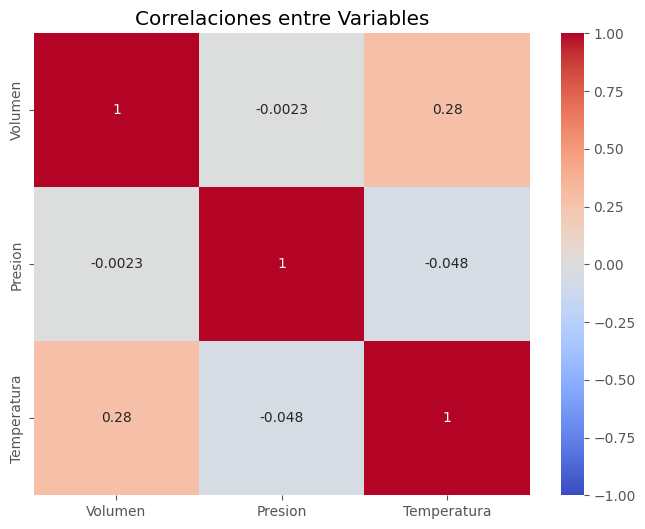

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.002282     0.280288
Presion     -0.002282  1.000000    -0.047996
Temperatura  0.280288 -0.047996     1.000000

Número de anomalías detectadas: 4

Ejemplos de anomalías:
                    Fecha    Volumen tipo_anomalia
12613 2020-06-22 18:00:00  65.936644  Alto consumo
21439 2021-06-25 15:00:00  48.170119  Alto consumo
30881 2022-07-27 17:00:00  59.608207  Alto consumo
40680 2023-09-09 01:00:00  48.912497  Alto consumo


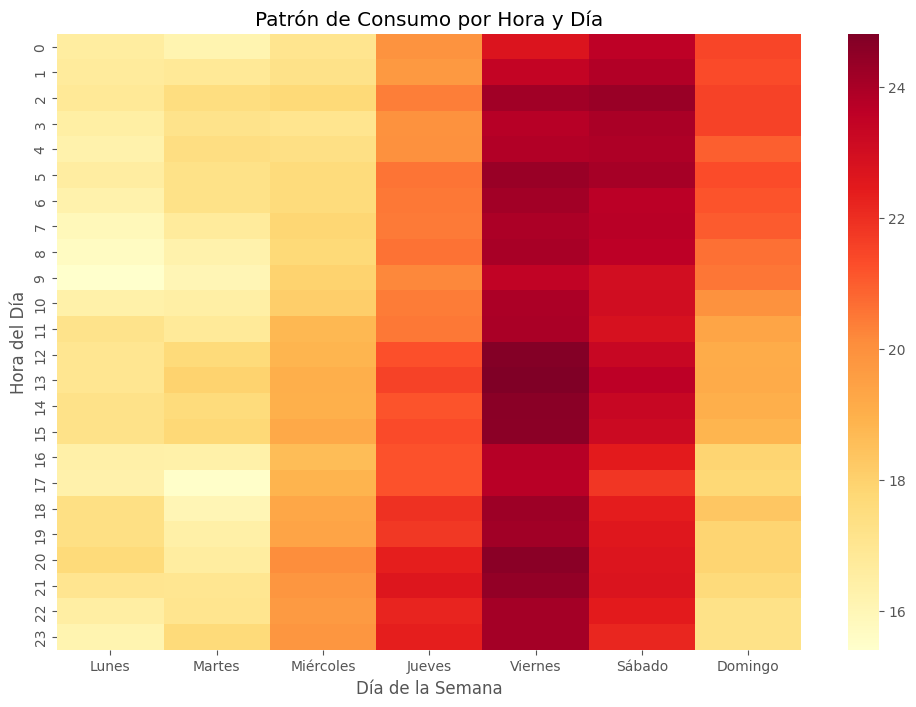


Análisis para CLIENTE2

Estadísticas básicas de consumo:
count    41382.000000
mean        61.819045
std         17.495571
min          0.000000
25%         51.809989
50%         61.814487
75%         71.742183
max        517.564868
Name: Volumen, dtype: float64

Correlaciones entre variables:


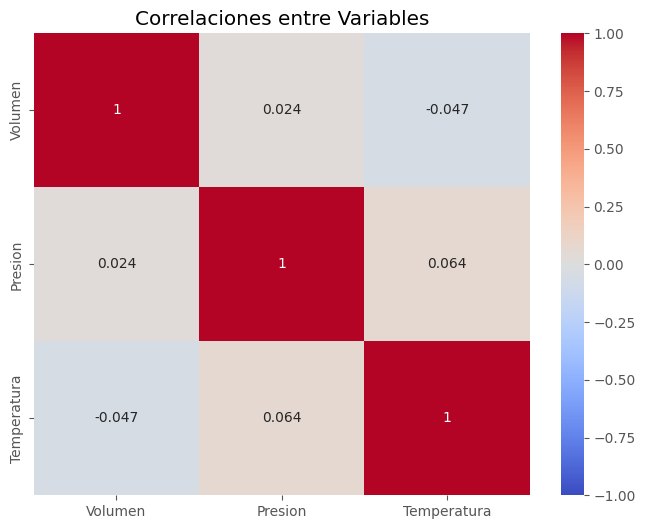

              Volumen   Presion  Temperatura
Volumen      1.000000  0.024041    -0.047198
Presion      0.024041  1.000000     0.063640
Temperatura -0.047198  0.063640     1.000000

Número de anomalías detectadas: 512

Ejemplos de anomalías:
                  Fecha     Volumen tipo_anomalia
41  2019-01-15 17:00:00    4.197631  Bajo consumo
44  2019-01-15 20:00:00  126.520748  Alto consumo
135 2019-01-19 15:00:00    0.000000  Bajo consumo
156 2019-01-20 12:00:00    0.000000  Bajo consumo
180 2019-01-21 12:00:00    0.000000  Bajo consumo


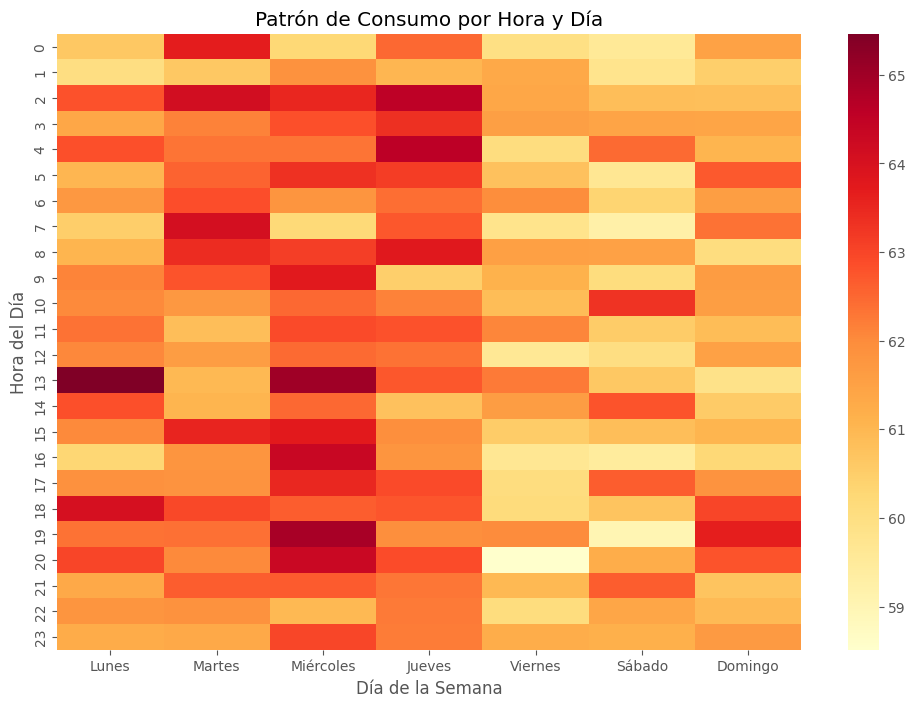


Análisis para CLIENTE3

Estadísticas básicas de consumo:
count    42248.000000
mean       117.500121
std         39.856005
min          0.000000
25%         91.205546
50%        125.520304
75%        147.830979
max        356.724008
Name: Volumen, dtype: float64

Correlaciones entre variables:


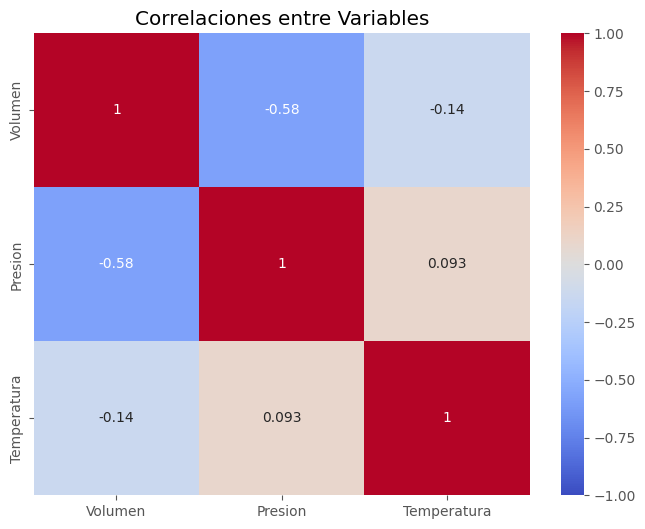

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.581275    -0.136022
Presion     -0.581275  1.000000     0.093260
Temperatura -0.136022  0.093260     1.000000

Número de anomalías detectadas: 18

Ejemplos de anomalías:
                    Fecha     Volumen tipo_anomalia
4039  2019-07-09 03:00:00  245.987932  Alto consumo
12230 2020-06-21 02:00:00  249.001168  Alto consumo
13176 2020-07-31 09:00:00  244.031243  Alto consumo
13335 2020-08-07 00:00:00  253.061513  Alto consumo
24667 2021-11-30 12:00:00  265.577320  Alto consumo


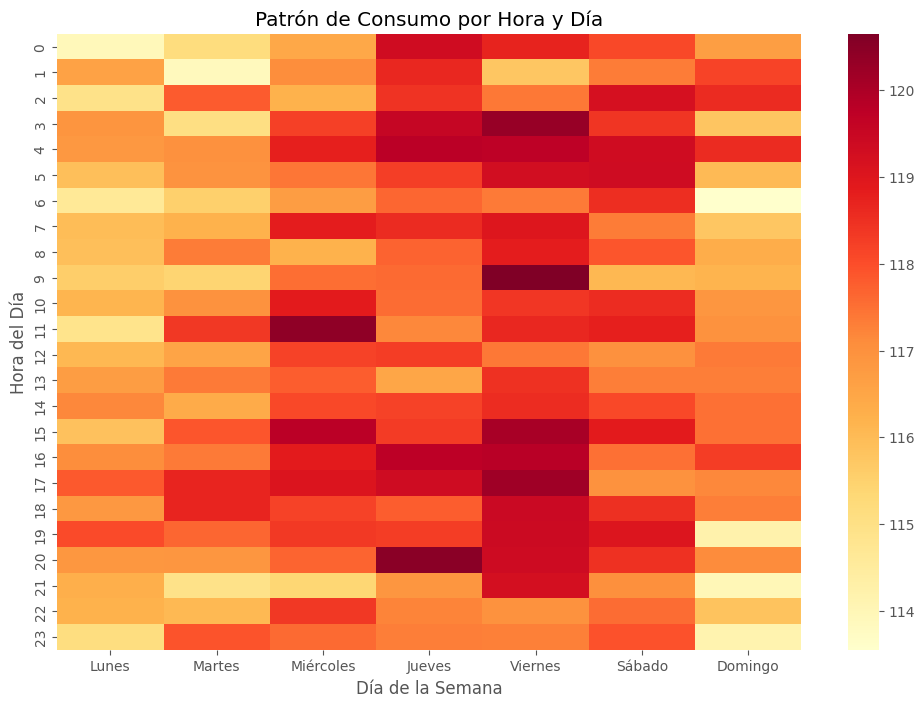


Análisis para CLIENTE4

Estadísticas básicas de consumo:
count    42305.000000
mean        17.351570
std         60.953148
min          0.000000
25%          0.000000
50%          0.000000
75%          0.004557
max        363.009776
Name: Volumen, dtype: float64

Correlaciones entre variables:


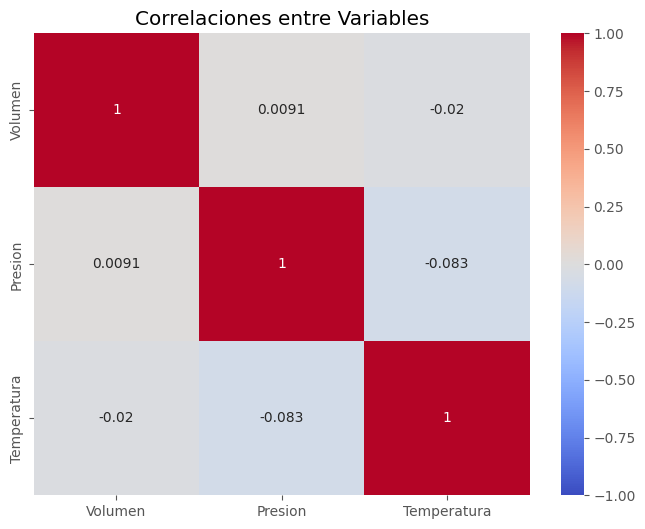

              Volumen   Presion  Temperatura
Volumen      1.000000  0.009146    -0.019658
Presion      0.009146  1.000000    -0.082990
Temperatura -0.019658 -0.082990     1.000000

Número de anomalías detectadas: 2399

Ejemplos de anomalías:
                 Fecha     Volumen tipo_anomalia
55 2019-01-16 07:00:00  243.304276  Alto consumo
57 2019-01-16 09:00:00  260.184302  Alto consumo
58 2019-01-16 10:00:00  234.788039  Alto consumo
59 2019-01-16 11:00:00  219.877043  Alto consumo
60 2019-01-16 12:00:00  218.544049  Alto consumo


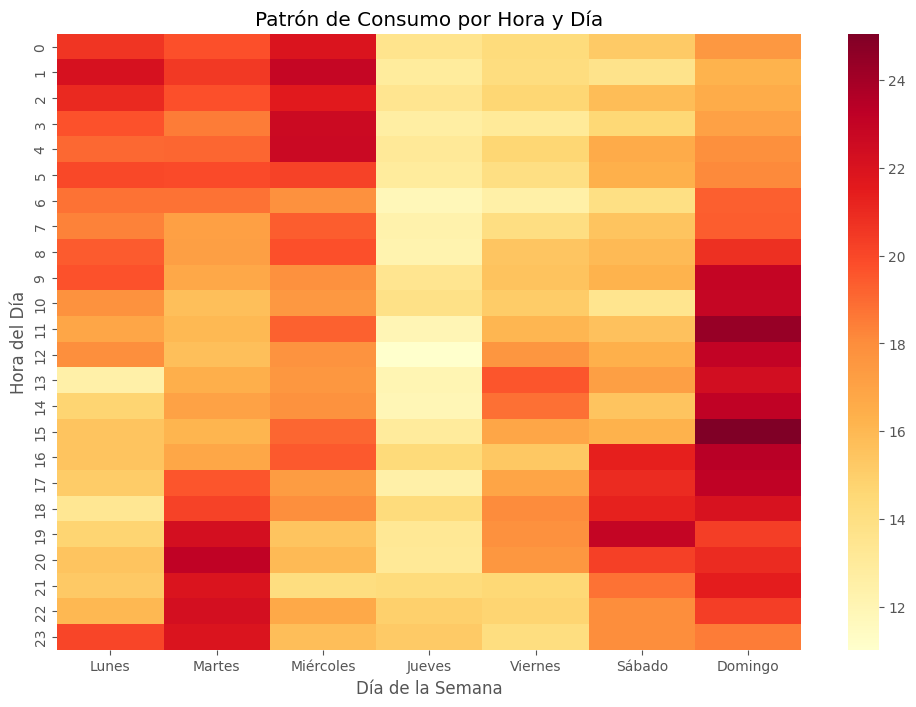


Análisis para CLIENTE5

Estadísticas básicas de consumo:
count    43415.000000
mean         7.817773
std          6.410365
min          0.000000
25%          2.208475
50%          7.119554
75%         12.111280
max         89.245051
Name: Volumen, dtype: float64

Correlaciones entre variables:


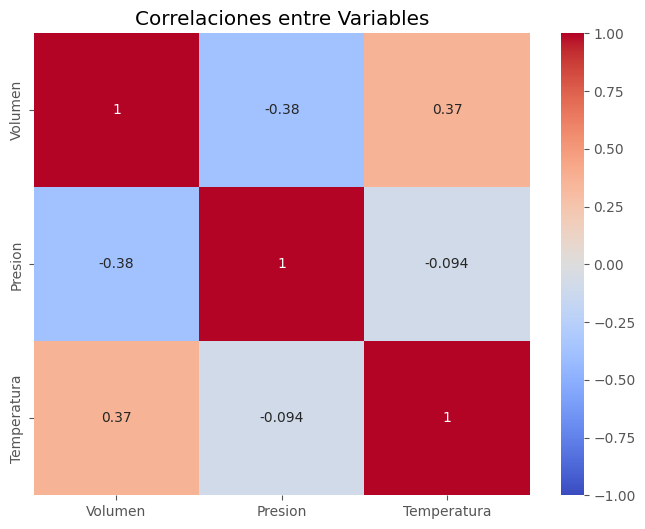

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.382353     0.365965
Presion     -0.382353  1.000000    -0.093551
Temperatura  0.365965 -0.093551     1.000000

Número de anomalías detectadas: 201

Ejemplos de anomalías:
                   Fecha    Volumen tipo_anomalia
56   2019-01-16 08:00:00  32.722901  Alto consumo
1746 2019-03-27 18:00:00  30.285427  Alto consumo
1751 2019-03-27 23:00:00  68.101381  Alto consumo
3201 2019-05-27 09:00:00  34.105497  Alto consumo
3370 2019-06-03 10:00:00  27.456176  Alto consumo


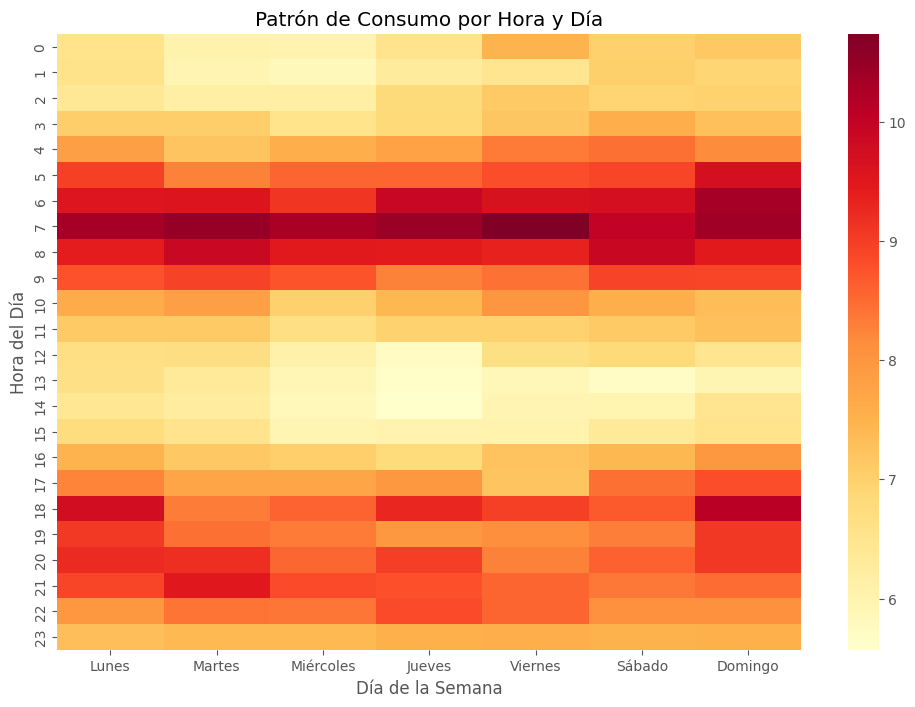


Análisis para CLIENTE6

Estadísticas básicas de consumo:
count    42808.000000
mean       153.799976
std         84.906689
min          0.000000
25%         54.236215
50%        198.223662
75%        218.285302
max        366.656382
Name: Volumen, dtype: float64

Correlaciones entre variables:


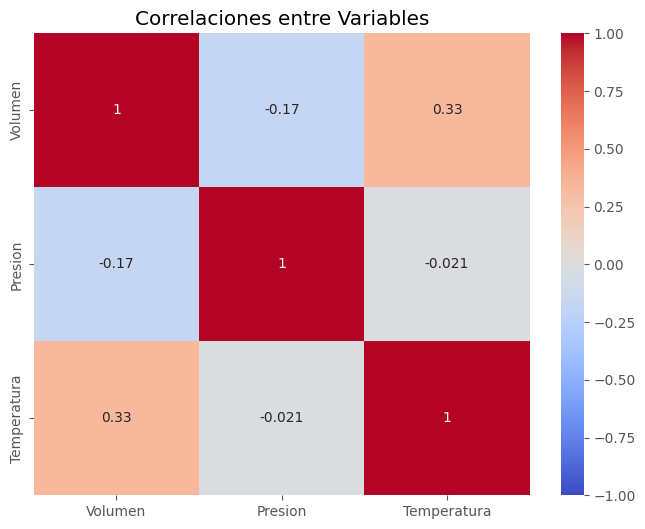

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.171633     0.334344
Presion     -0.171633  1.000000    -0.021103
Temperatura  0.334344 -0.021103     1.000000

Número de anomalías detectadas: 0


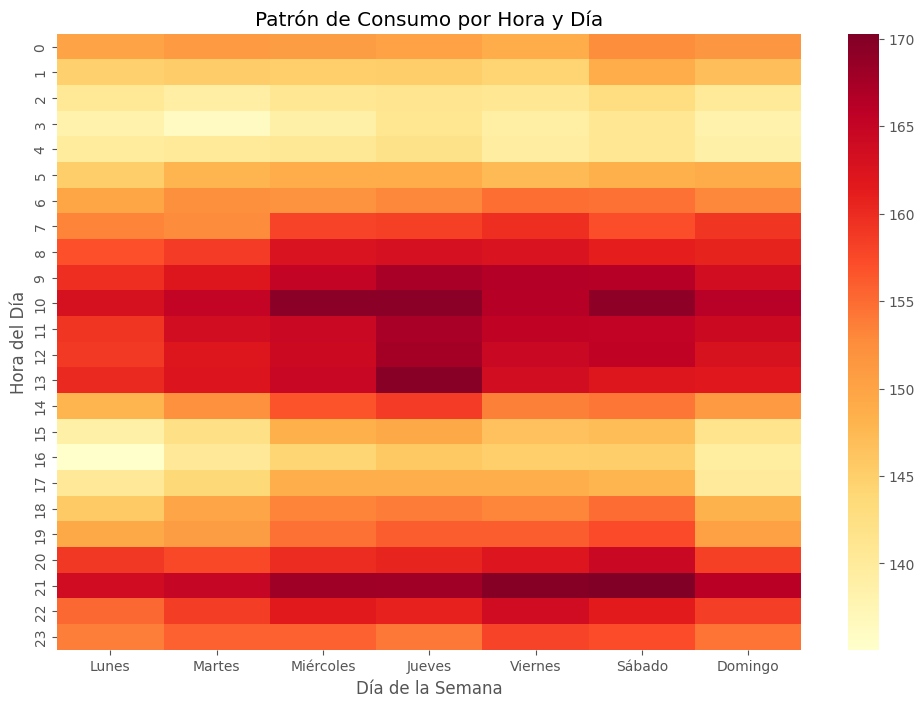


Análisis para CLIENTE7

Estadísticas básicas de consumo:
count    41776.000000
mean        27.294379
std         33.875124
min          0.000000
25%          0.000000
50%          0.000000
75%         61.996865
max        175.763858
Name: Volumen, dtype: float64

Correlaciones entre variables:


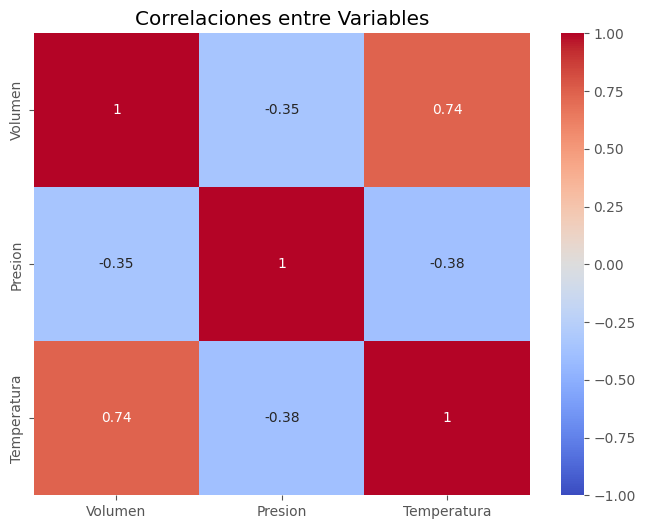

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.349134     0.735402
Presion     -0.349134  1.000000    -0.383563
Temperatura  0.735402 -0.383563     1.000000

Número de anomalías detectadas: 3

Ejemplos de anomalías:
                    Fecha     Volumen tipo_anomalia
16629 2021-01-11 16:00:00  175.763858  Alto consumo
25833 2022-02-10 22:00:00  147.414489  Alto consumo
32452 2022-12-03 06:00:00  133.493400  Alto consumo


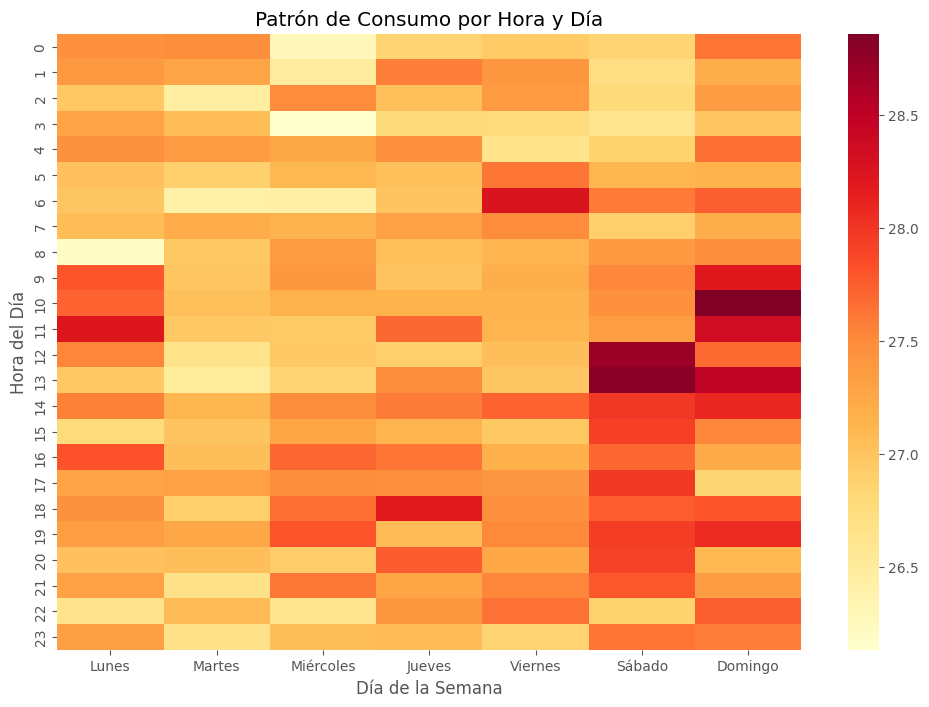


Análisis para CLIENTE8

Estadísticas básicas de consumo:
count    43147.000000
mean       178.591825
std         90.850586
min          0.000000
25%         87.837958
50%        221.111139
75%        246.243866
max        522.780891
Name: Volumen, dtype: float64

Correlaciones entre variables:


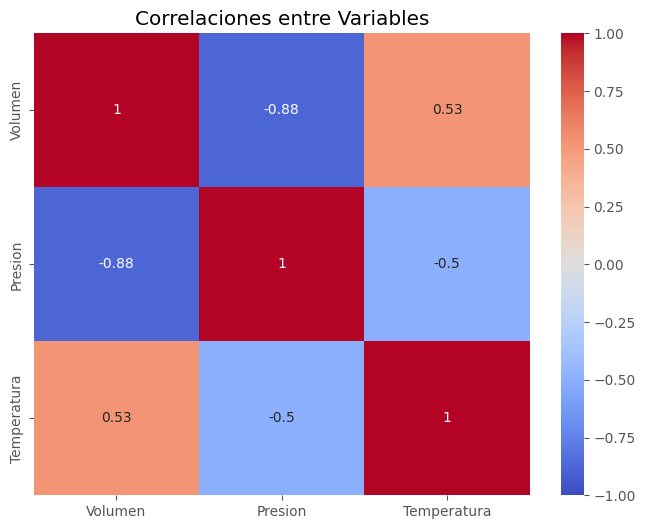

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.881600     0.525602
Presion     -0.881600  1.000000    -0.497768
Temperatura  0.525602 -0.497768     1.000000

Número de anomalías detectadas: 2

Ejemplos de anomalías:
                    Fecha     Volumen tipo_anomalia
24840 2021-11-24 16:00:00  494.500595  Alto consumo
40827 2023-09-25 08:00:00  522.780891  Alto consumo


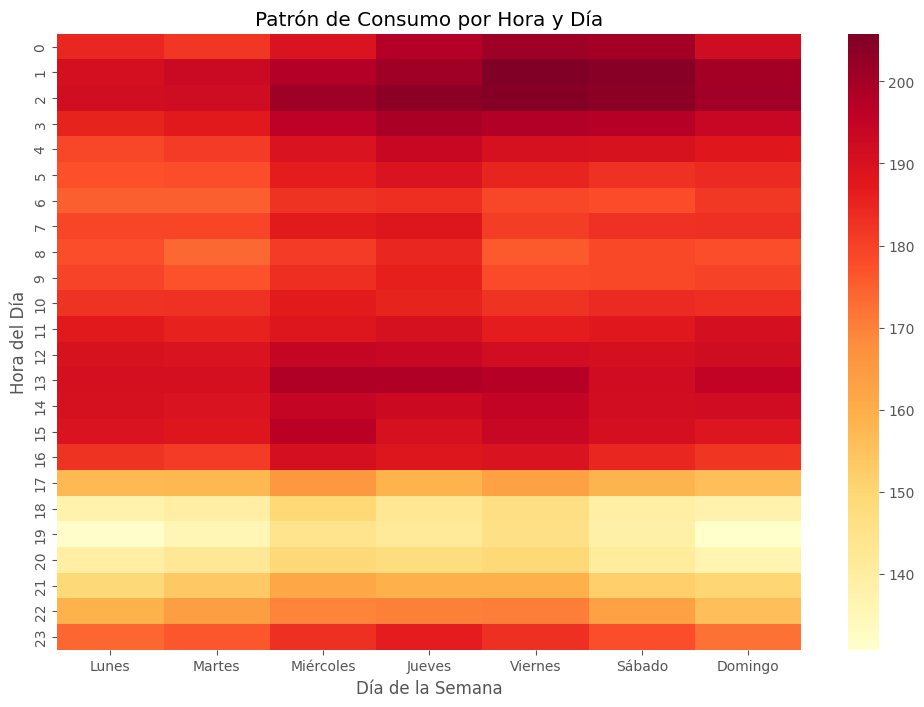


Análisis para CLIENTE9

Estadísticas básicas de consumo:
count    42428.000000
mean        12.734989
std         49.539841
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        366.016120
Name: Volumen, dtype: float64

Correlaciones entre variables:


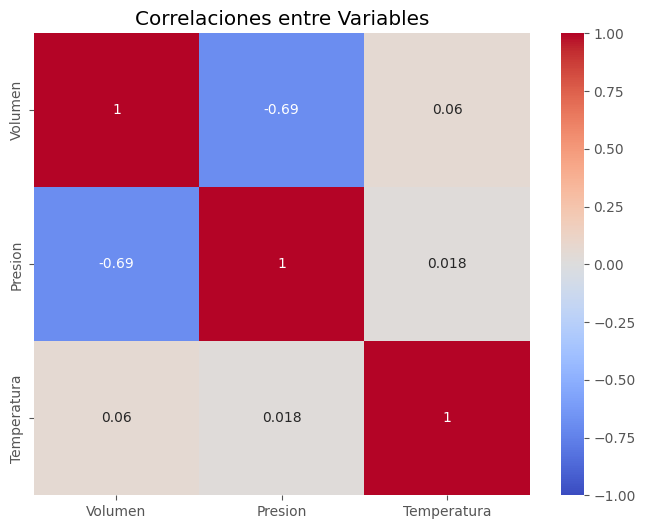

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.690166     0.060426
Presion     -0.690166  1.000000     0.017969
Temperatura  0.060426  0.017969     1.000000

Número de anomalías detectadas: 1795

Ejemplos de anomalías:
                  Fecha     Volumen tipo_anomalia
293 2019-01-26 05:00:00  321.704527  Alto consumo
294 2019-01-26 06:00:00  174.742376  Alto consumo
295 2019-01-26 07:00:00  203.997442  Alto consumo
296 2019-01-26 08:00:00  265.976868  Alto consumo
297 2019-01-26 09:00:00  235.264873  Alto consumo


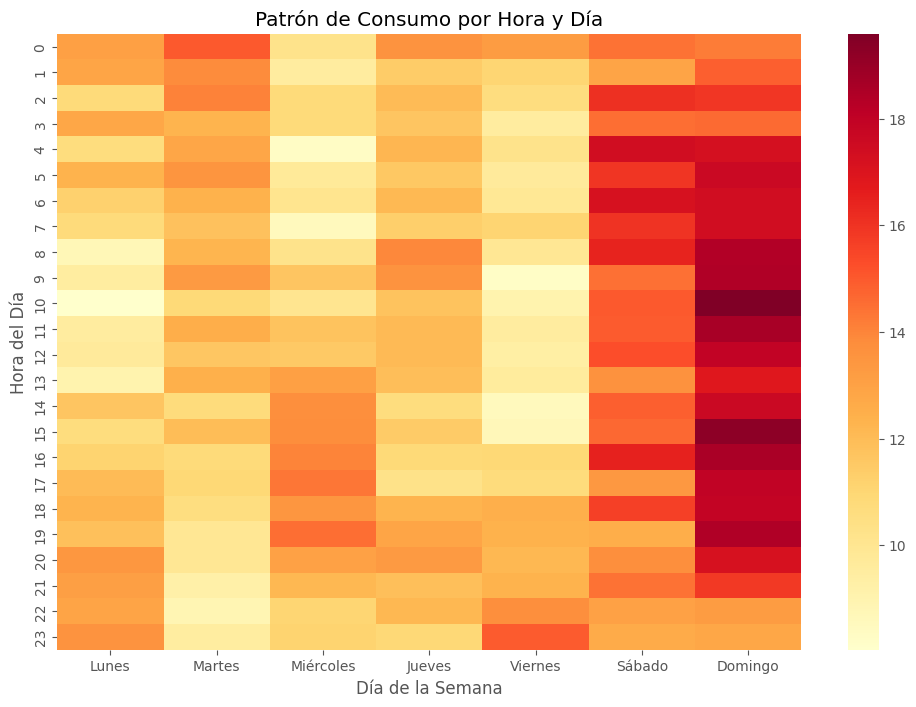


Análisis para CLIENTE10

Estadísticas básicas de consumo:
count    41059.000000
mean        11.788209
std         43.991880
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        247.072990
Name: Volumen, dtype: float64

Correlaciones entre variables:


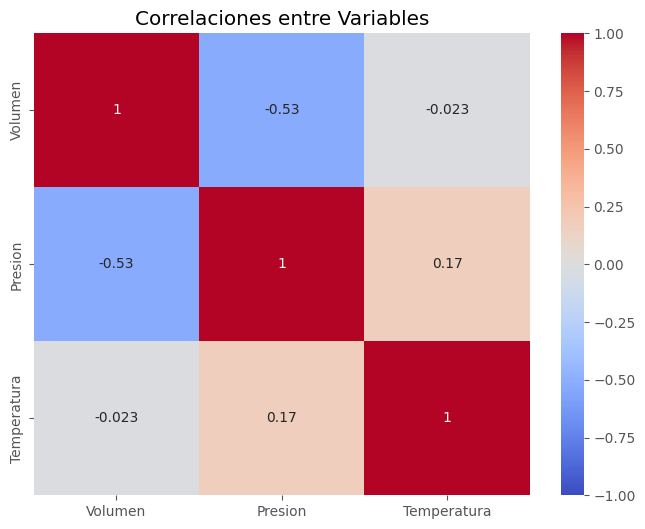

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.529623    -0.022519
Presion     -0.529623  1.000000     0.170611
Temperatura -0.022519  0.170611     1.000000

Número de anomalías detectadas: 2117

Ejemplos de anomalías:
                  Fecha     Volumen tipo_anomalia
192 2019-01-22 00:00:00  188.295664  Alto consumo
193 2019-01-22 01:00:00  195.992694  Alto consumo
194 2019-01-22 02:00:00  193.513959  Alto consumo
195 2019-01-22 03:00:00  179.276437  Alto consumo
196 2019-01-22 04:00:00  175.374577  Alto consumo


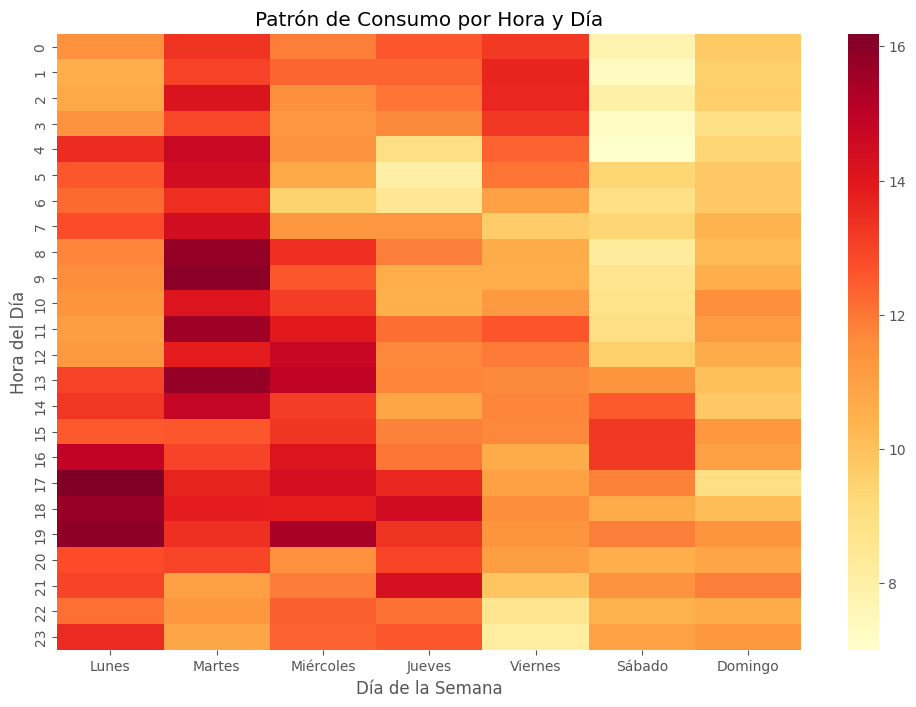


Análisis para CLIENTE11

Estadísticas básicas de consumo:
count    42248.000000
mean       131.648637
std         34.225487
min          0.000000
25%        110.646887
50%        136.075518
75%        155.613085
max        298.259573
Name: Volumen, dtype: float64

Correlaciones entre variables:


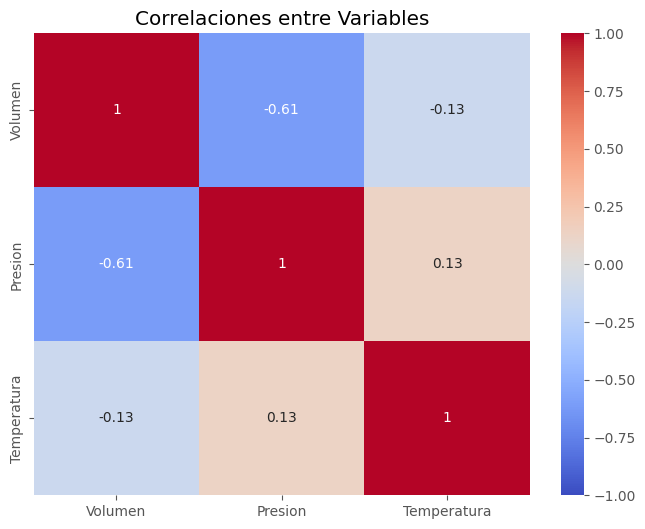

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.610483    -0.132636
Presion     -0.610483  1.000000     0.131980
Temperatura -0.132636  0.131980     1.000000

Número de anomalías detectadas: 146

Ejemplos de anomalías:
                   Fecha    Volumen tipo_anomalia
203  2019-01-22 11:00:00   4.283945  Bajo consumo
337  2019-01-28 01:00:00  19.222103  Bajo consumo
1141 2019-03-03 08:00:00  18.710221  Bajo consumo
1150 2019-03-03 17:00:00  23.403523  Bajo consumo
1246 2019-03-07 18:00:00  26.587436  Bajo consumo


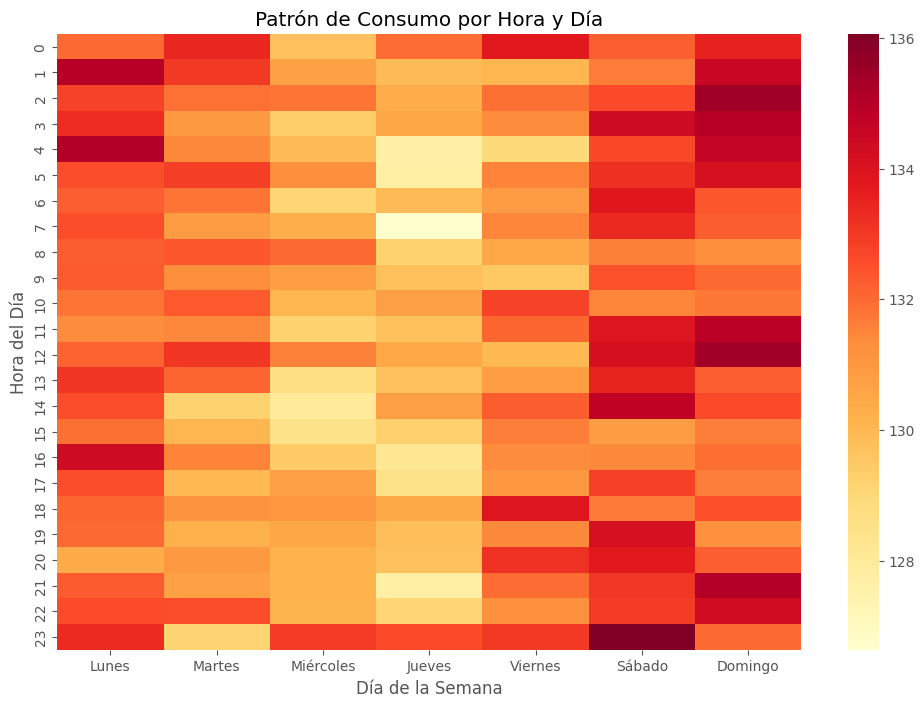


Análisis para CLIENTE12

Estadísticas básicas de consumo:
count    41776.000000
mean        33.731496
std         41.952033
min          0.000000
25%          0.000000
50%          0.000000
75%         77.654802
max        284.475087
Name: Volumen, dtype: float64

Correlaciones entre variables:


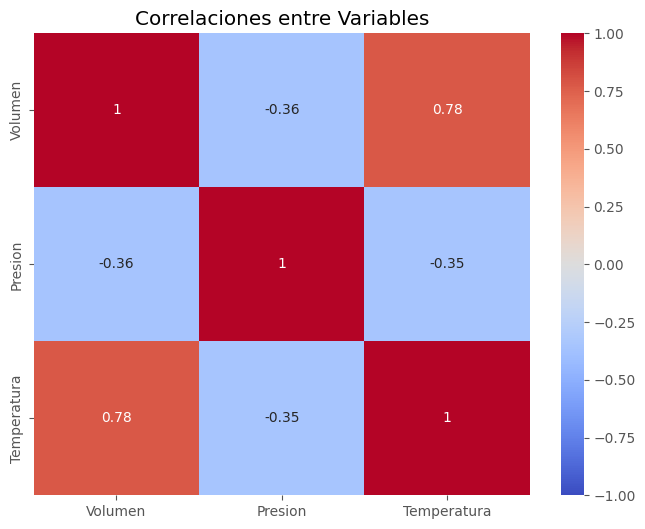

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.358849     0.776739
Presion     -0.358849  1.000000    -0.351330
Temperatura  0.776739 -0.351330     1.000000

Número de anomalías detectadas: 6

Ejemplos de anomalías:
                    Fecha     Volumen tipo_anomalia
15183 2020-11-12 02:00:00  224.196397  Alto consumo
24264 2021-12-06 13:00:00  178.106396  Alto consumo
25179 2022-01-14 13:00:00  160.164870  Alto consumo
26217 2022-02-28 07:00:00  234.390413  Alto consumo
41120 2023-12-04 08:00:00  284.475087  Alto consumo


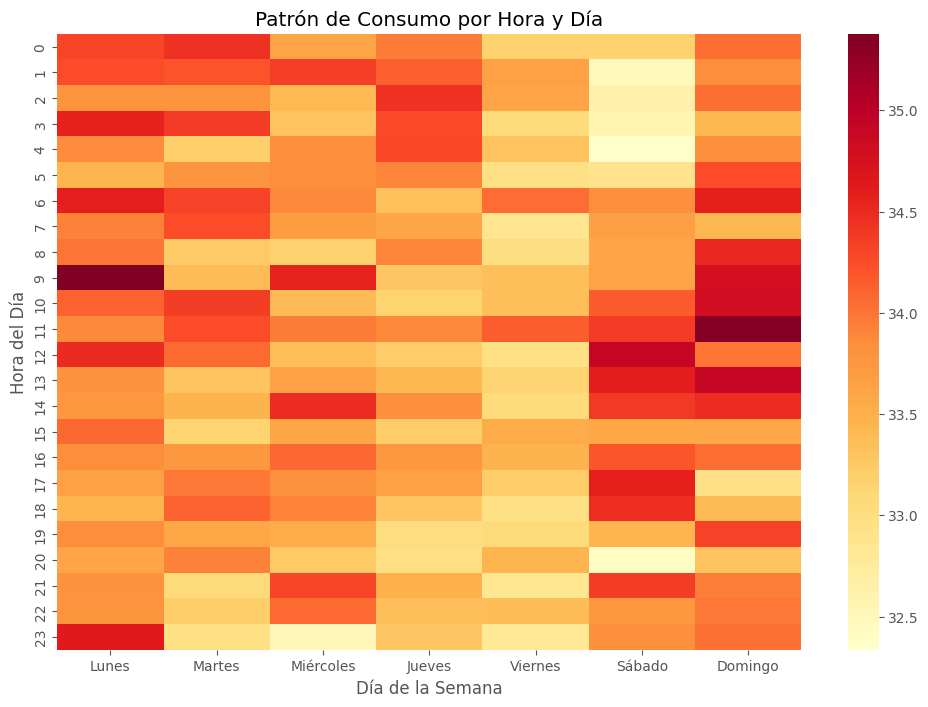


Análisis para CLIENTE13

Estadísticas básicas de consumo:
count    41059.000000
mean        10.276088
std         41.184079
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        253.867916
Name: Volumen, dtype: float64

Correlaciones entre variables:


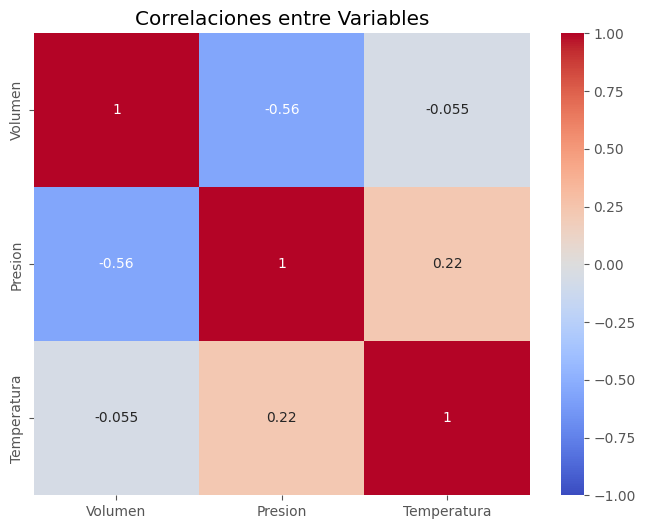

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.559701    -0.055341
Presion     -0.559701  1.000000     0.222848
Temperatura -0.055341  0.222848     1.000000

Número de anomalías detectadas: 1893

Ejemplos de anomalías:
                  Fecha     Volumen tipo_anomalia
284 2019-01-25 20:00:00  218.120188  Alto consumo
285 2019-01-25 21:00:00  169.142899  Alto consumo
286 2019-01-25 22:00:00  193.149003  Alto consumo
287 2019-01-25 23:00:00  168.890949  Alto consumo
288 2019-01-26 00:00:00  174.071820  Alto consumo


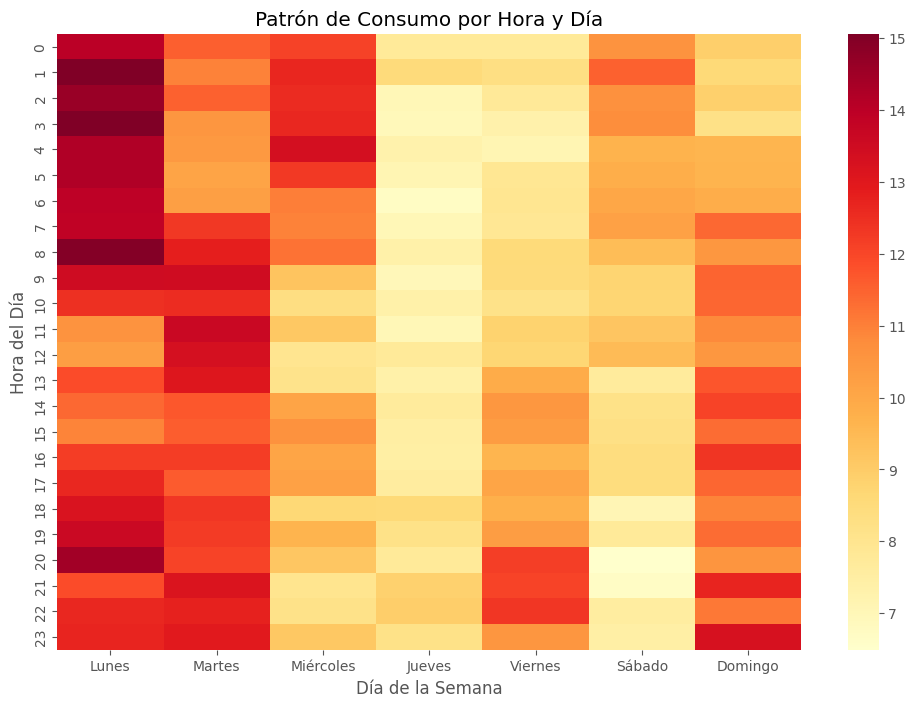


Análisis para CLIENTE14

Estadísticas básicas de consumo:
count    43415.000000
mean         7.301900
std          5.257558
min          0.000000
25%          3.097458
50%          6.749423
75%         10.871643
max         36.793150
Name: Volumen, dtype: float64

Correlaciones entre variables:


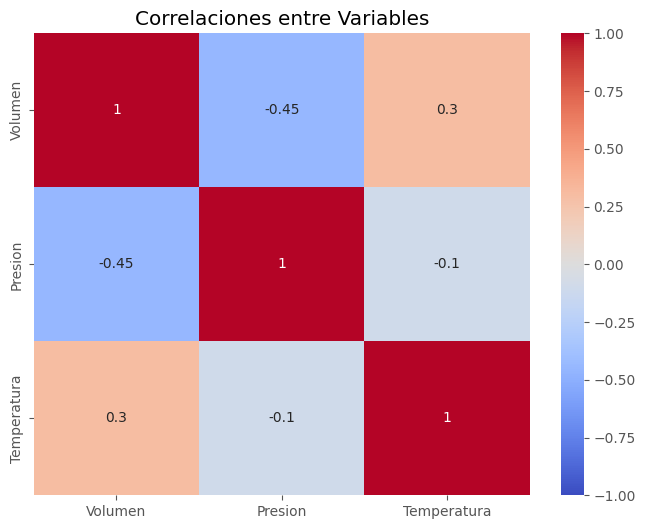

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.447156     0.299668
Presion     -0.447156  1.000000    -0.100571
Temperatura  0.299668 -0.100571     1.000000

Número de anomalías detectadas: 121

Ejemplos de anomalías:
                    Fecha    Volumen tipo_anomalia
3732  2019-06-18 12:00:00  24.551442  Alto consumo
13804 2020-08-12 05:00:00  26.666129  Alto consumo
20926 2021-06-06 07:00:00  28.481443  Alto consumo
25584 2021-12-17 18:00:00  25.729052  Alto consumo
26688 2022-02-01 18:00:00  24.958383  Alto consumo


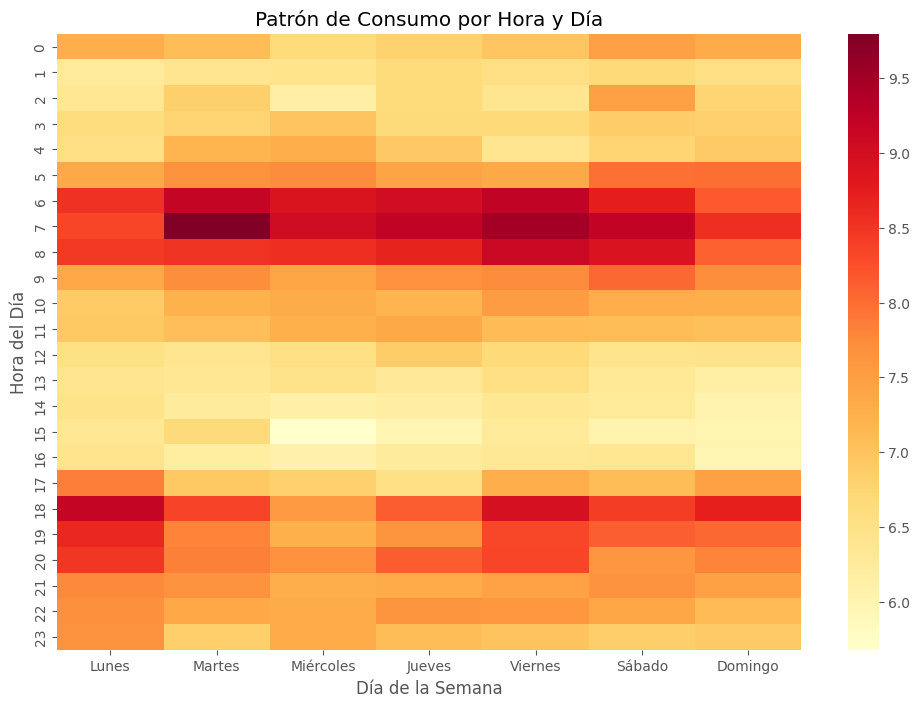


Análisis para CLIENTE15

Estadísticas básicas de consumo:
count    42428.000000
mean        12.553861
std         47.565636
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        398.042027
Name: Volumen, dtype: float64

Correlaciones entre variables:


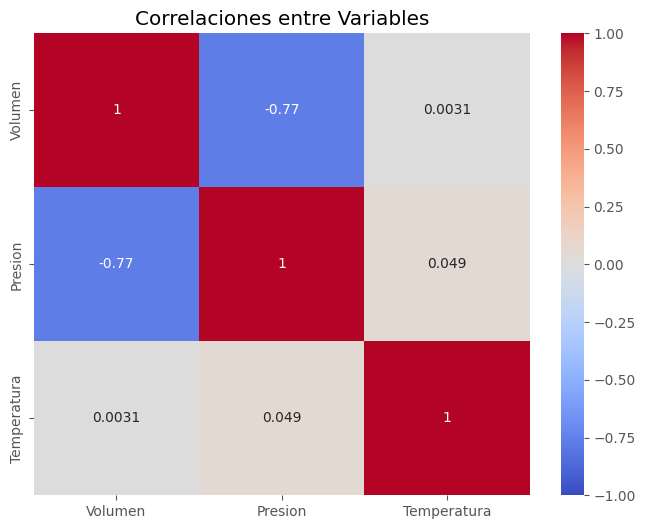

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.769150     0.003084
Presion     -0.769150  1.000000     0.048946
Temperatura  0.003084  0.048946     1.000000

Número de anomalías detectadas: 1603

Ejemplos de anomalías:
                   Fecha     Volumen tipo_anomalia
2230 2019-04-23 17:00:00  170.623645  Alto consumo
2234 2019-04-23 21:00:00  206.179630  Alto consumo
2235 2019-04-23 22:00:00  243.571100  Alto consumo
3092 2019-05-29 17:00:00  228.778681  Alto consumo
3093 2019-05-29 18:00:00  212.368645  Alto consumo


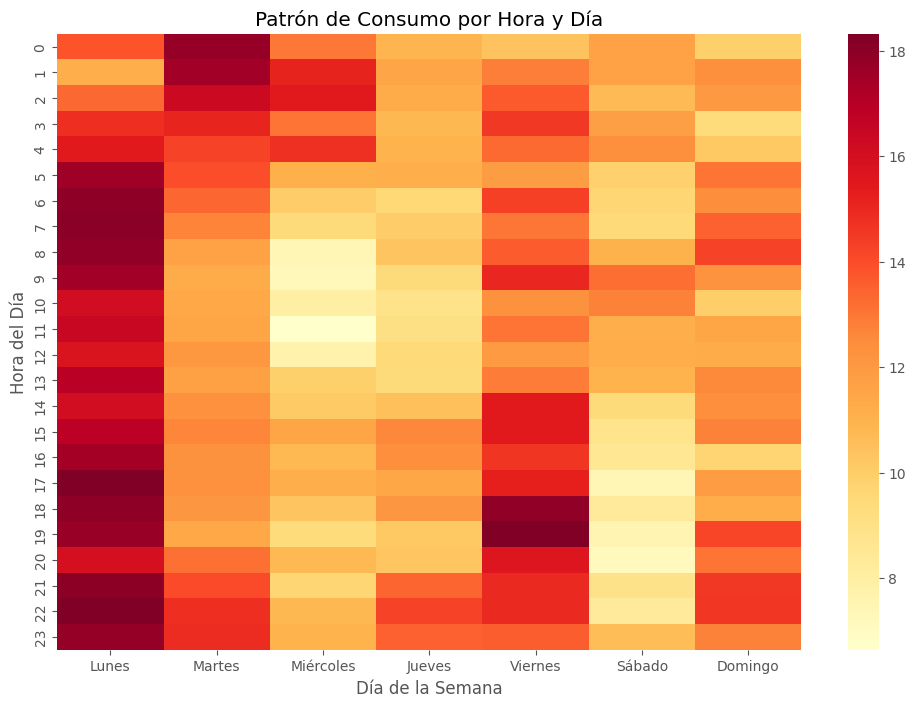


Análisis para CLIENTE16

Estadísticas básicas de consumo:
count    43147.000000
mean       178.133946
std         74.649969
min          0.000000
25%        114.279073
50%        210.869993
75%        231.370549
max        409.872212
Name: Volumen, dtype: float64

Correlaciones entre variables:


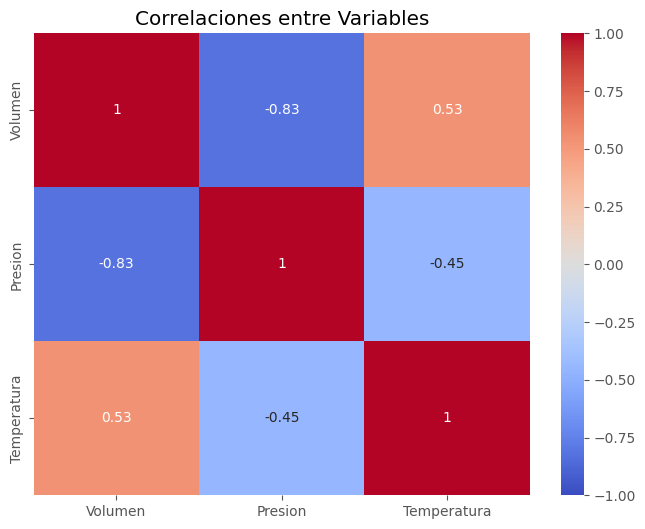

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.827919     0.531643
Presion     -0.827919  1.000000    -0.446146
Temperatura  0.531643 -0.446146     1.000000

Número de anomalías detectadas: 1

Ejemplos de anomalías:
                   Fecha     Volumen tipo_anomalia
8970 2020-01-29 01:00:00  409.872212  Alto consumo


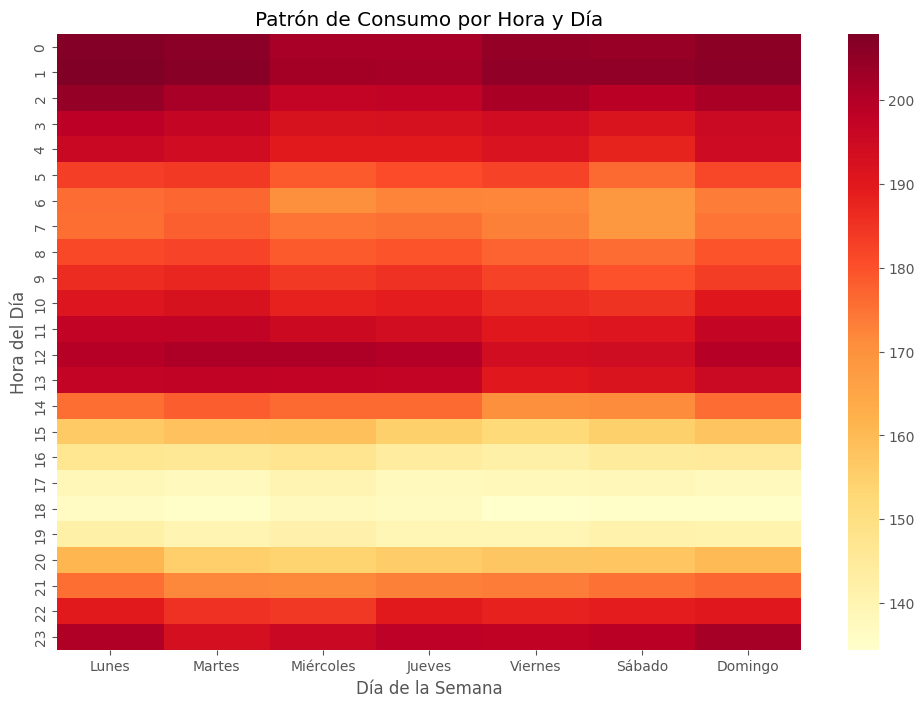


Análisis para CLIENTE17

Estadísticas básicas de consumo:
count    43412.000000
mean        20.564425
std          5.566153
min          0.000000
25%         18.426473
50%         21.748120
75%         24.243031
max         48.504833
Name: Volumen, dtype: float64

Correlaciones entre variables:


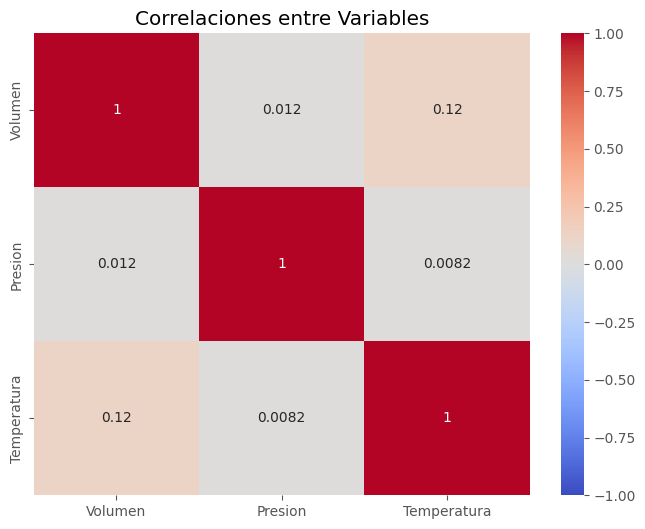

              Volumen   Presion  Temperatura
Volumen      1.000000  0.012304     0.121682
Presion      0.012304  1.000000     0.008230
Temperatura  0.121682  0.008230     1.000000

Número de anomalías detectadas: 196

Ejemplos de anomalías:
                   Fecha   Volumen tipo_anomalia
2418 2019-04-24 20:00:00  3.815609  Bajo consumo
2419 2019-04-24 21:00:00  1.351092  Bajo consumo
3422 2019-06-05 16:00:00  1.419336  Bajo consumo
3426 2019-06-05 20:00:00  3.091274  Bajo consumo
4096 2019-07-03 18:00:00  2.869349  Bajo consumo


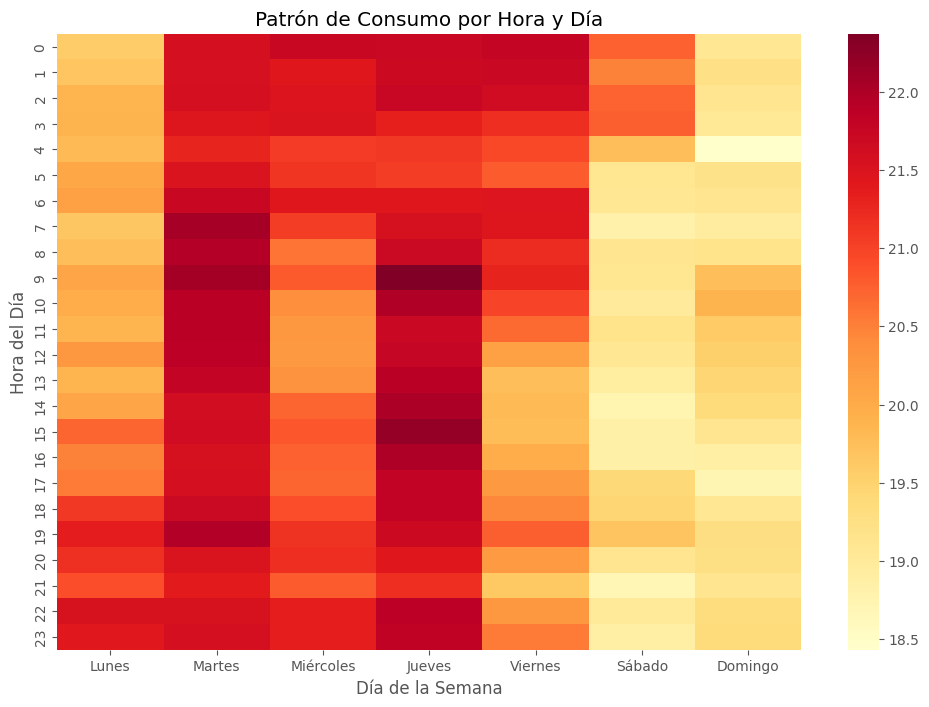


Análisis para CLIENTE18

Estadísticas básicas de consumo:
count    41382.000000
mean        61.758087
std         18.201164
min          0.000000
25%         51.444677
50%         62.074886
75%         72.198499
max        577.413425
Name: Volumen, dtype: float64

Correlaciones entre variables:


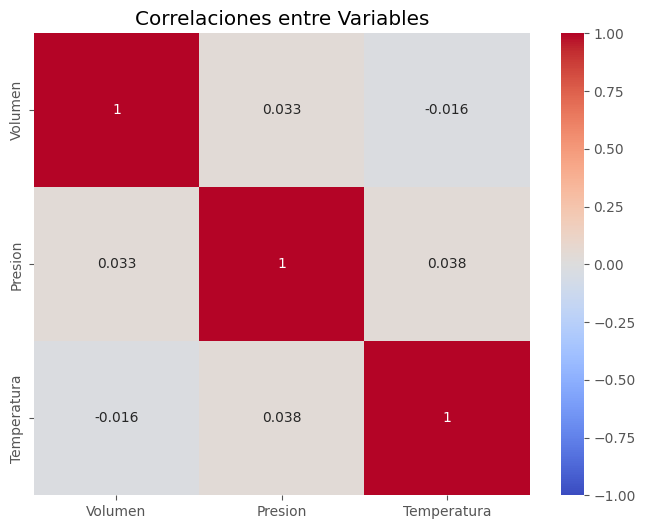

              Volumen   Presion  Temperatura
Volumen      1.000000  0.033047    -0.015699
Presion      0.033047  1.000000     0.037942
Temperatura -0.015699  0.037942     1.000000

Número de anomalías detectadas: 518

Ejemplos de anomalías:
                  Fecha     Volumen tipo_anomalia
42  2019-01-15 18:00:00    0.000000  Bajo consumo
213 2019-01-22 21:00:00    0.000000  Bajo consumo
219 2019-01-23 03:00:00  117.043326  Alto consumo
279 2019-01-25 15:00:00    0.000000  Bajo consumo
291 2019-01-26 03:00:00    0.000000  Bajo consumo


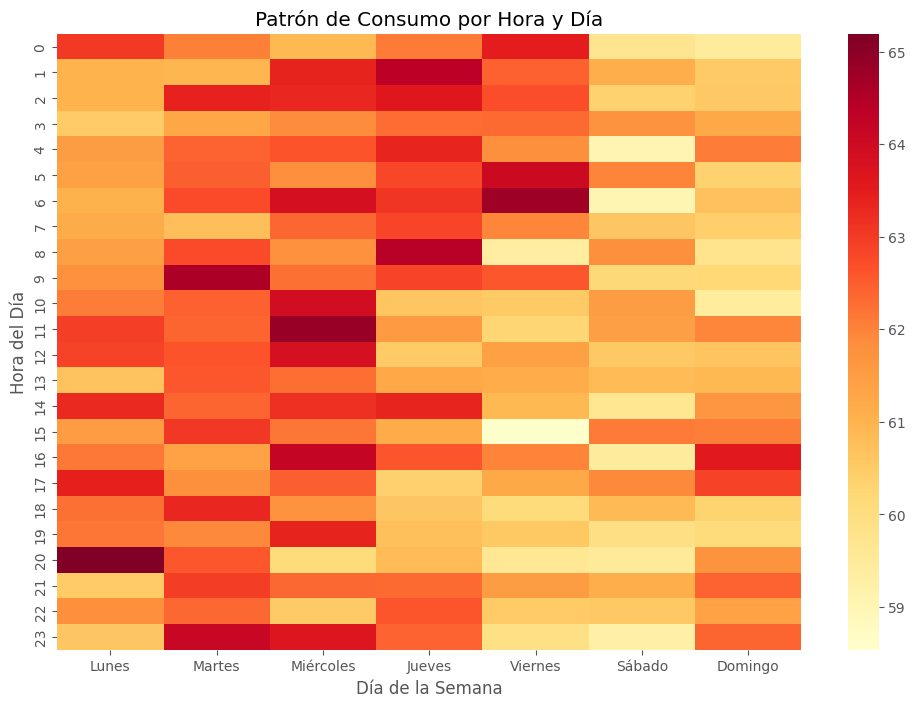


Análisis para CLIENTE19

Estadísticas básicas de consumo:
count    42305.000000
mean        15.918062
std         59.478001
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        378.267803
Name: Volumen, dtype: float64

Correlaciones entre variables:


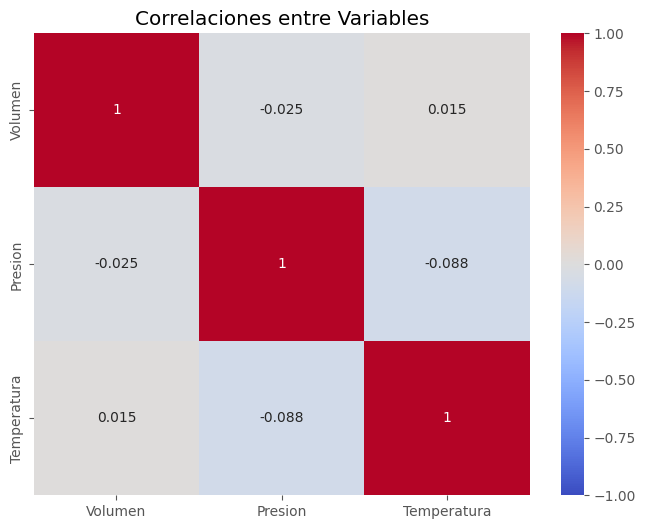

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.024714      0.01544
Presion     -0.024714  1.000000     -0.08791
Temperatura  0.015440 -0.087910      1.00000

Número de anomalías detectadas: 2322

Ejemplos de anomalías:
                  Fecha     Volumen tipo_anomalia
161 2019-01-20 17:00:00  258.849290  Alto consumo
162 2019-01-20 18:00:00  305.449587  Alto consumo
163 2019-01-20 19:00:00  286.375429  Alto consumo
164 2019-01-20 20:00:00  366.745084  Alto consumo
165 2019-01-20 21:00:00  266.000000  Alto consumo


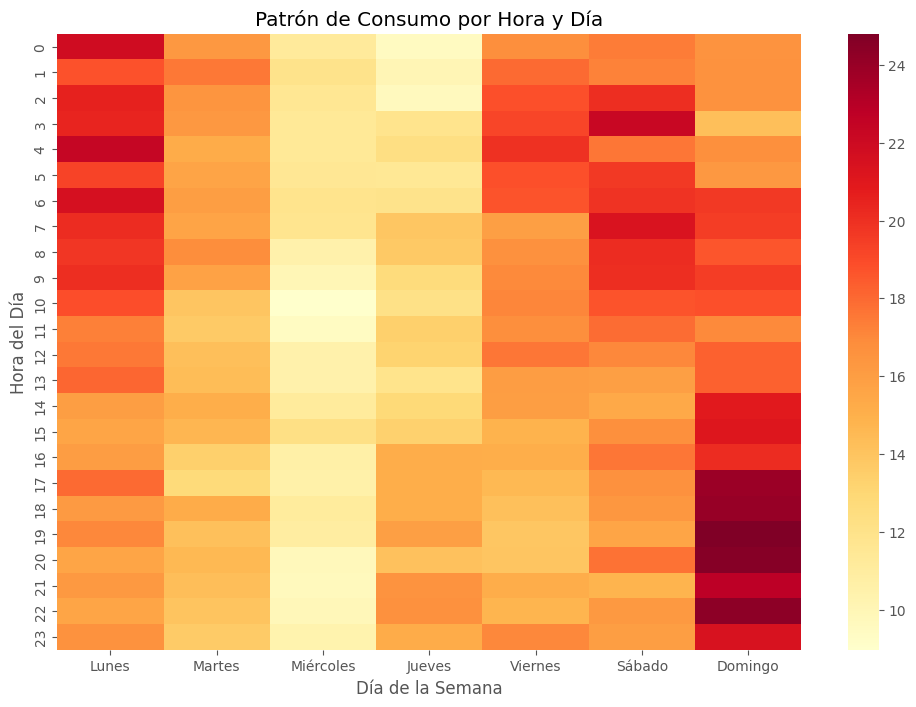


Análisis para CLIENTE20

Estadísticas básicas de consumo:
count    42808.000000
mean       160.816734
std         82.779691
min          0.000000
25%         83.683978
50%        201.764987
75%        221.329637
max        315.884153
Name: Volumen, dtype: float64

Correlaciones entre variables:


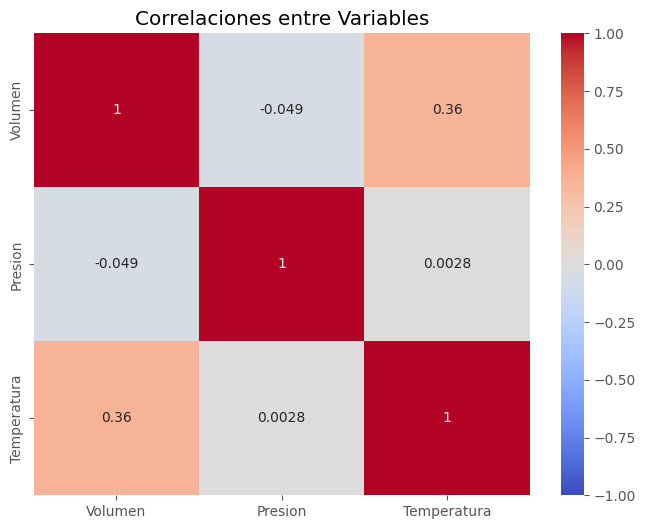

              Volumen   Presion  Temperatura
Volumen      1.000000 -0.048987     0.364365
Presion     -0.048987  1.000000     0.002765
Temperatura  0.364365  0.002765     1.000000

Número de anomalías detectadas: 0


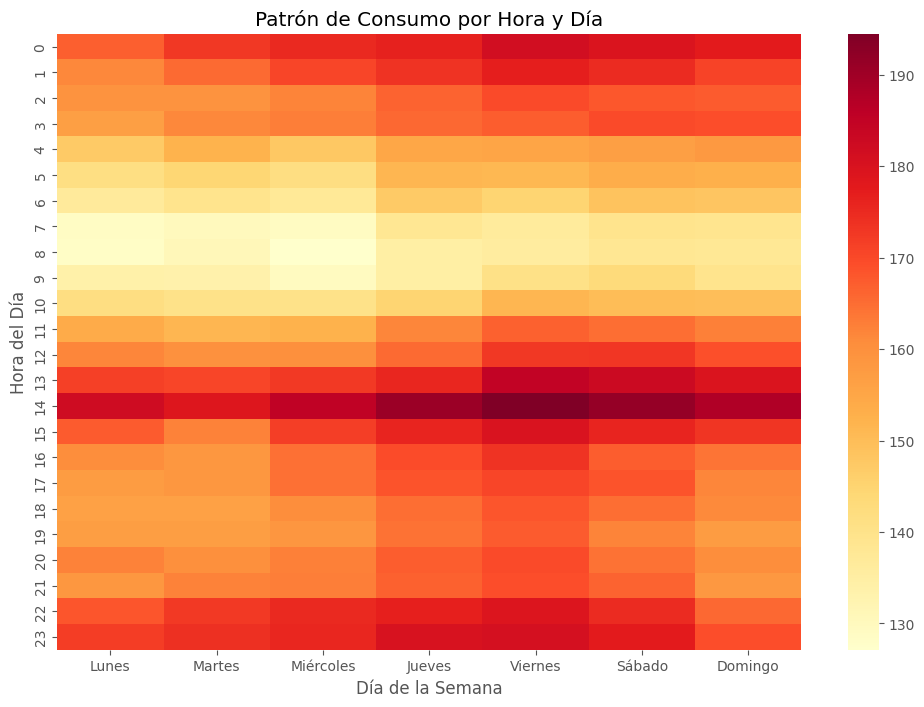

In [33]:
def analizar_patrones_consumo(df):
    """
    Analiza los patrones de consumo por hora y día de la semana
    """
    # Promedio de consumo por hora y día de la semana
    pivot_consumo = df.pivot_table(
        values='Volumen',
        index='hora',
        columns='dia_semana',
        aggfunc='mean'
    )
    
    # Crear heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_consumo, cmap='YlOrRd', 
                xticklabels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
    plt.title('Patrón de Consumo por Hora y Día')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Hora del Día')
    plt.show()
    
    return pivot_consumo

def analizar_correlaciones(df):
    """
    Analiza las correlaciones entre Volumen, presión y temperatura
    """
    # Matriz de correlación
    corr_matrix = df[['Volumen', 'Presion', 'Temperatura']].corr()
    
    # Visualización de correlaciones
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlaciones entre Variables')
    plt.show()
    
    return corr_matrix

def detectar_anomalias(df, n_std=3):
    """
    Detecta anomalías en el consumo usando método de desviación estándar
    """
    # Calcular límites
    mean = df['Volumen'].mean()
    std = df['Volumen'].std()
    
    anomalias = df[
        (df['Volumen'] > mean + n_std * std) |
        (df['Volumen'] < mean - n_std * std)
    ].copy()
    
    # Agregar clasificación de anomalía
    anomalias['tipo_anomalia'] = np.where(
        anomalias['Volumen'] > mean + n_std * std,
        'Alto consumo',
        'Bajo consumo'
    )
    
    return anomalias

def comparar_clientes(client_dfs):
    """
    Compara estadísticas básicas entre clientes
    """
    stats_dict = {}
    
    for client, df in client_dfs.items():
        stats_dict[client] = {
            'consumo_promedio': df['Volumen'].mean(),
            'consumo_max': df['Volumen'].max(),
            'consumo_min': df['Volumen'].min(),
            'desviacion_std': df['Volumen'].std()
        }
    
    return pd.DataFrame(stats_dict).T

def generar_reporte(client_dfs):
    """
    Genera un reporte completo del análisis
    """
    for client, df in client_dfs.items():
        print(f"\n{'='*50}")
        print(f"Análisis para {client}")
        print(f"{'='*50}")
        
        # 1. Estadísticas básicas
        print("\nEstadísticas básicas de consumo:")
        print(df['Volumen'].describe())
        
        # 2. Correlaciones
        print("\nCorrelaciones entre variables:")
        corr_matrix = analizar_correlaciones(df)
        print(corr_matrix)
        
        # 3. Anomalías
        anomalias = detectar_anomalias(df)
        print(f"\nNúmero de anomalías detectadas: {len(anomalias)}")
        if len(anomalias) > 0:
            print("\nEjemplos de anomalías:")
            print(anomalias[['Fecha', 'Volumen', 'tipo_anomalia']].head())
        
        # 4. Visualizaciones
        analizar_patrones_consumo(df)

    
# Comparar clientes
comparacion = comparar_clientes(client_dfs)
print("\nComparación entre clientes:")
print(comparacion)

# Generar reporte completo
generar_reporte(client_dfs)